## To use this slideshow:
- Run All, using the menu item: Kernel/Restart & Run All
- Return to this top cell
- click on "Slideshow" menu item above, that looks like this:
![](images/SlideIcon.png)

![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)


<h1 align='center'>Artificial Intelligence for Educators</h1>

<h3 align='center'>BC Science Teachers' Association Conference</h3>

<h4 align='center'>with Laura G Funderburk @LGFunderburk </h4>

![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)

<h2 align='center'>Workshop at a glance</h2>

1. Introductions. 
2. The Callysto program.
2. What is data? What is data science? What is artificial intelligence (AI)?
3. Motivating the importance of ethics in AI. 
4. Working example: individual sport, team sport, or no sport?

    
    

<h2 align='center'> About the Callysto Program</h2>

- Provide open educational infrastructure and learning resources
- Focus on making computational thinking and data science/literacy available
- Use Jupyter notebooks as main platform
- Host teacher and student training workshops

<h3 align='center'>Brought to you by</h3>


| | | |
|-|-|-|
|<img src="./images/Cybera_Logo_RBG_Colour.png" alt="Drawing" width="400"/>|<img src="./images/PIMS_Logos_Web_PIMS_Logo_Colour.png" alt="Drawing" width="400"/>| <img src="./images/With_Funding_Canada_Wordmark-colour_BIL-EN.png" alt="Drawing" width="400"/>|

<h2 align='center'>What is a Jupyter notebook?</h2>

A Jupyter notebook is an online document that can include both text and (Python) code in different “cells” or parts of the document.

These documents run on Callysto Hub as well as Google Colab, IBM Watson Studio, and other places.


This presentation is a Jupyter notebook!

<h2 align='center'>What is Callysto?</h2>

Callysto is a free, online learning tool that helps students and teachers learn and apply in-demand data science skills including data analysis, visualization, coding, and computational thinking. The online tool’s interactive learning modules are available in a variety of subjects – from math to history – and are aligned with existing curriculum.

Callysto’s learning modules are built using Jupyter notebooks.

<h2 align='center'> Callysto notebooks ready for you to use</h2>

On our website callysto.ca you will find lesson plans, courses and learning modules that support you incorporate coding into your stats lesson. 

#### Objective: explore how we can use Callysto to explore machine learning in the classroom


| |
|-|
|<img src="./images/samplenotebooks.png" width="600">|



<h2 align='center'>What is Data?</h2>

Data is a collection of information. Usually obtained (or collected) to address a specific issue. 

Examples of data:

- Daily number of COVID-19 cases in Canada.
- The grades of your class. 
- Census data.

<center><img src="https://img2.pngio.com/download-free-png-19-data-graph-icon-packs-vector-icon-packs-data-graph-png-600_564.png" width="400"></center>

<h2 align='center'>Example: Collecting data on people's preferred season</h2>


In [1]:
# Collect data
total_participants = 30
prefer_spring = 5
prefer_summer = 10
prefer_fall = 10
prefer_winter = 5
no_answer = total_participants - (prefer_spring + prefer_summer + prefer_fall + prefer_winter)

In [2]:
import pandas as pd
answer = {"Season": ["Spring", "Summer", "Fall", "Winter", "No answer"],
           "Count": [prefer_spring, prefer_summer, prefer_fall, prefer_winter, no_answer]}

answer_table = pd.DataFrame(answer)
answer_table

,Season,Count
0,Spring,5
1,Summer,10
2,Fall,10
3,Winter,5
4,No answer,0


<h2 align='center'>Example: Visualizing data</h2>

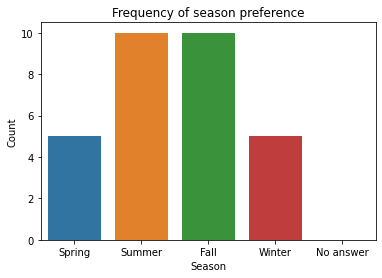

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = answer_table["Season"], y =  answer_table['Count'])
plt.title("Frequency of season preference")
plt.ylabel("Count")
plt.xlabel("Season")
plt.show()

<h2 align='center'>What is Data Science?</h2>

Data science involves <b>obtaining</b> and <b>communicating</b> information from (usually large) sets of observations.


| |
|-|
| <img src="./images/what-is-data-science-workflow.jpg" alt="Drawing" width="800"/> |



<h2 align='center'>What is Artificial Intelligence?</h2>

Artificial Intelligence (AI) is a blanket term describing all efforts to make computer “think”.

Machine Learning (ML) algorithms are programs that improve, or “learn”, through exposure to data/experience.

ML is based on the idea that machines should be able to learn and adapt through experience. AI refers to a broader idea where machines can execute tasks "smartly."

AI applies ML and other techniques to solve actual problems.



<h2 align='center'>Motivating the role of ethics in AI</h2>


* Increase in the use of artificial intelligence in our everyday lives.

    1. ML algorithms that screen resumes for job postings, o assign credit scores
    2. Robotics (self driving cars)
    3. YouTube algorithms to suggest content
    


<h2 align='center'>Motivating the role of ethics in AI</h2>

    
* Using AI to make decisions impacting lives, or access to resources.

    1. Determine who gets into university.
    2. Determine outcome of a criminal case.
    3. Use online metadata to determine and predict behaviour.

<h2 align='center'> What are the potential impacts on education and society, and how do we talk to students about all of this? </h2>

- What are the consequences of wrongly assigning someone an outcome based on data?

- How do we mitigate and minimize erros?

- How do we measure errors and limitations? 

Predictions will be made based on training data that is provided $\Rightarrow$ bias in training data increases probability for bias in predicted outcome. 


<h2 align='center'>Example: individual vs team sport assignment</h2>

Data has been collected from 150 male students (all 18 years old) in three groups: 

1. 50 students excelled in team sports (football, basketball, hockey)

2. 50 students excelled in individual sports (swimming, cycling, snowboarding)

3. 50 students did not excel in any sports.


The students were scored by the same coach in the same school. The following parameters were collected.

1. Team work skills 

2. Speed 

3. Strength

4. Height

<h4 align='center'>Goal: given new data from students, use an algorithm that will recommend whether the student should pick individual sports, team sports or no sports.</h4>

<h2 align='center'>Discussion: Identifying pitfalls early</h2>

What problems can you identify in this problem statement? 

What biases in the data can you identify?

What are the consequences of those biases when the algorithm is in action? i.e. who is left out of activities, who is included in activities?

<h2 align='center'>Process</h2>

1. Get familiar with the data (table, summary statistics, plots)

2. Training the model with data

3. Evaluate model accuracy

4. Report findings

<h2 align='center'>Training the model with data</h2>

* Determine the independent and dependent variables.

* Split data into two sets: 

    1. Training set: data points with full information the algorithm uses to learn.

    2. Testing set: data points with partial information that the algorithm predicts on. Predictions are known by the programmer. 

* Compare the predictions against the true results, evaluate false positives and false negatives.

<h2 align='center'>Manage & Clean Data</h2>

In [ ]:
# load and visualize the data
from pandas import read_csv
from sklearn import datasets
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
# machine learning
from sklearn.model_selection import train_test_split
# compare algorithms
from sklearn.svm import SVC
# Evaluate model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm, datasets
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
df['y'] = y

df['y'].replace({0:"Individual sport",
           1: "No sport",
           2: "Team sport"},inplace=True)

df.rename(columns={"sepal length (cm)":"Strength",
                   "sepal width (cm)": "Speed",
                   "petal length (cm)": "TeamInclination",
                   "petal width (cm)": "Height",
                   "y":"SelectedSport"}, inplace= True)

In [ ]:
df

<h2 align='center'>Exploratory analysis</h2>

<h3 align='center'>Getting summary stats for all students</h3>

In [ ]:
df.describe()

<h3 align='center'> Getting summary stats for specific activities</h3>

In [ ]:
individual = df[df['SelectedSport']=='Individual sport']
no_sport = df[df['SelectedSport']=='No sport']
team_sport = df[df['SelectedSport']=='Team sport']


team_sport.describe()

<h3 align='center'>Generating visualization from summary stats</h3>

In [ ]:
import ipywidgets as widgets
from IPython.display import display
dropdowna = widgets.Dropdown(
    options=['Strength', 'Speed', 'TeamInclination','Height'],
    value='Strength',
    description='Item:',
    disabled=False,
)

In [ ]:
# box and whisker plots
display(dropdowna)
print("Scores for:",dropdowna.value)
sns.catplot(x="SelectedSport", y=dropdowna.value, data=df,hue='SelectedSport',kind='box');

<h3 align='center'> Generating distribution visualization </h3>

In [ ]:
dropdownb = widgets.Dropdown(
    options=['Strength', 'Speed', 'TeamInclination','Height'],
    value='Strength',
    description='Item:',
    disabled=False,
)

In [ ]:
display(dropdownb)
print("Histogram for various measurements (per class): ",dropdownb.value)
sns.displot(df, x=dropdownb.value, col="SelectedSport", multiple="dodge");

In [ ]:
sns.pairplot(df,hue='SelectedSport');

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

<h2 align='center'>Insights</h2>

| Activity | Team affinity | Speed | Strength | Height|
| -    | -          | -     | -        | -     |
|Independent sport|Lowest |Highest  | Lowest | Lowest |
|No sport|Medium|Lowest|  Medium| Medium |
|Team sport|Highest|Medium| Highest| Highest |


<h2 align='center'> Machine learning technique </h2>

Split data set into training and testing data.

We will provide random data points for the algorithm to "learn" (training set). 

We will test how well the model does by providing the testing set to the algorithm after it trains. 


In [ ]:
array = df.values
# All measurements
X = array[:,0:4]
# All classes
y = array[:,4]
# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, 
                                                                test_size=0.20, 
                                                                random_state=1, 
                                                                shuffle=True)

We will use Support Vector Machines (SVM) - a type of algorithm exploring non-linear relationships.

In [ ]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
print(accuracy_score(Y_validation, predictions))

We can see that the accuracy is 0.966 or about 96% on the hold out dataset.

In [ ]:
print(classification_report(Y_validation, predictions))

The metrics are calculated by using true and false positives, true and false negatives.



Precision is the ability of a classifier not to label an instance positive that is actually negative.

Recall is the ability of a classifier to find all positive instances. For each class, it is the ratio of true positives to the sum of true positives and false negatives.

F1-score is the average of precision and recall, where each of the two measurements are given equal weight. 1.0 is the best score, 0.0 is the worst score. 

The support is the number of samples of the true response that lie in that class.

In [ ]:
classifier = model.fit(X_train, Y_train)
class_names = iris.target_names
print("Confusion matrix")
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(classifier, X_validation, Y_validation,display_labels=class_names,cmap=plt.cm.Blues,
                      normalize=None,ax=ax);

 The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. 

<h2 align='center'>Final Analysis</h2>

<h3 align='center'>Let's take a look at the predicted values</h3>

In [ ]:
pred_df = pd.DataFrame(X_validation,columns=df.columns[0:4])

pred_df['Predicted Class'] = predictions

In [ ]:
dropdownc = widgets.Dropdown(
    options=['Individual sport', 'No sport', 'Team sport'],
    value='Individual sport',
    description='Class:',
    disabled=False,
)

In [ ]:
## 11 setosa, 12 versicolor, 7 virginica
display(dropdownc)
pred_df[pred_df['Predicted Class']==dropdownc.value]

### Which one did it get wrong? 


In [ ]:
import numpy as np
y_test = np.asarray(Y_validation)
misclassified = np.where(y_test != model.predict(X_validation))

print(misclassified)

<h2 align='center'>Reporting</h2>

The algorithm classified one sample as team sport, when it was no sport.

This entry is in row with index 22.

<h2 align='center'>Real examples</h2>

Amazon ditches AI recruiting tool that didn’t like women (Reuters) [link](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight-idUSKCN1MK08G)


Can Racist Algorithms Be Fixed? (The Marshall Project) [link](https://www.themarshallproject.org/2019/07/01/can-racist-algorithms-be-fixed)


Black and Asian faces misidentified more often by facial recognition software (CBC) [link](https://www.cbc.ca/news/technology/facial-recognition-race-1.5403899)


UK ditches exam results generated by biased algorithm after student protests (The Verge) [link](https://www.theverge.com/2020/8/17/21372045/uk-a-level-results-algorithm-biased-coronavirus-covid-19-pandemic-university-applications)

<h2 align='center'> What can we do? </h2>

- Work towards addressing our own biases in the classroom and daily life

- Identify how our biases play a role in our decision making

- Identify how our biases affect the machines we program 

- Collaborate with people offering diverse points of view

![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<h2 align='center'>Getting Started with Callysto</h2>

- Feedback form https://tinyurl.com/y2a3uhdt
- Online self-paced courses (courses.callysto.ca)  
- Preview our learning modules https://callysto.github.io/curriculum-jbook/intro.html
- Contact us for “in-class” workshops, teacher PD, virtual hackathons, and more

Email: contact@callysto.ca

On Twitter: @callysto_canada

Site: https://www.callysto.ca

YouTube https://www.youtube.com/channel/UCPdq1SYKA42EZBvUlNQUAng 

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)